In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Class Discussion

In [ ]:
data = pd.read_csv("https://gist.githubusercontent.com/mahmud-nobe/2522b2a51c0c773f97dc04fd466191a7/raw/3ef6ad30c577a6772de72adf7e9c6d8d47be5565/hyades.csv", index_col=0)
data

,HIP,p,pmra_cosd,pmdec,v_r,dec,ra
0,13834,31.41,234.79,-31.64,28.10,20.67,44.52
1,14838,19.44,154.61,-8.39,24.70,19.73,47.91
2,18170,24.14,143.97,-29.93,35.00,17.33,58.29
3,18735,21.99,129.49,-28.27,31.70,18.19,60.20
4,19554,25.89,146.86,5.00,36.60,5.52,62.83
5,20205,21.17,115.29,-23.86,39.28,15.63,64.95
6,20261,21.20,108.79,-20.67,36.20,15.10,65.15
7,20400,21.87,114.04,-21.40,37.80,14.08,65.51
8,20455,21.29,107.75,-28.84,39.65,17.54,65.73
9,20542,22.36,109.99,-33.47,39.20,17.44,66.02


### Convergent point


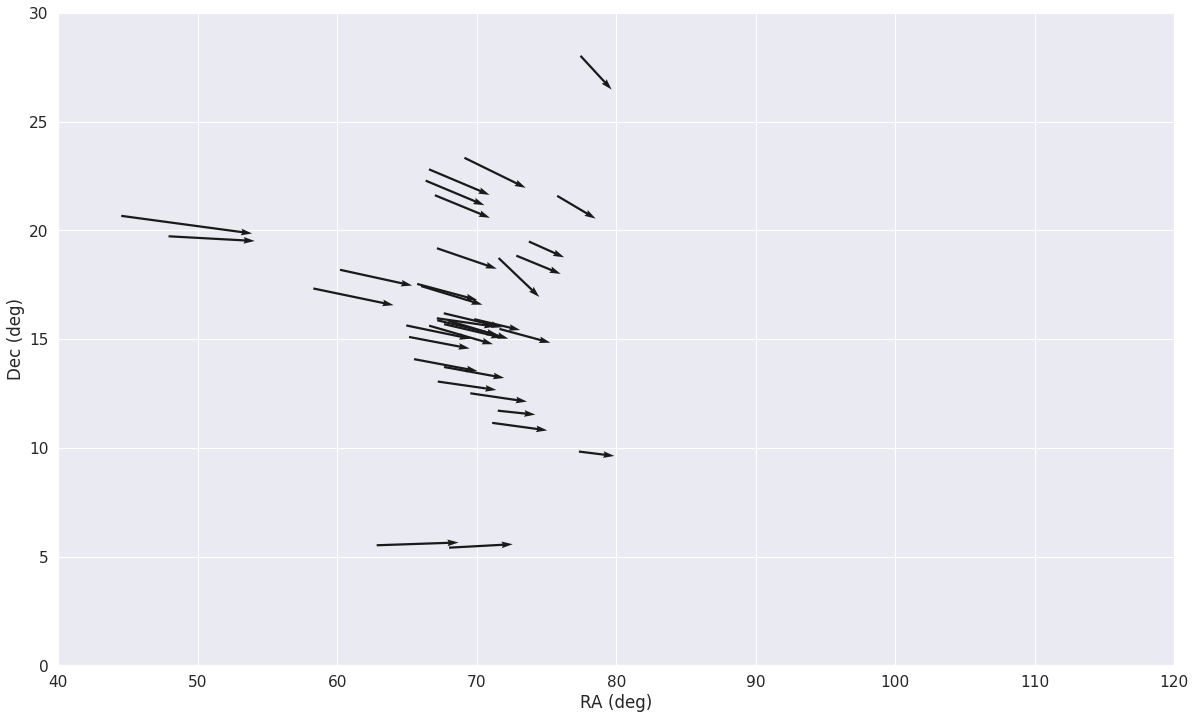

In [ ]:
plt.figure(figsize=(20, 12))

sns.set_style("whitegrid")
sns.set(font_scale = 1.4)
#from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.quiver(data.ra, data.dec, data.pmra_cosd, data.pmdec, width = 0.002)
#skyplot.xaxis_inverted()
plt.xlim(40, 120)
plt.ylim(0, 30)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.savefig('Sky Vector Plot (to find the convergent point).svg')
plt.show()

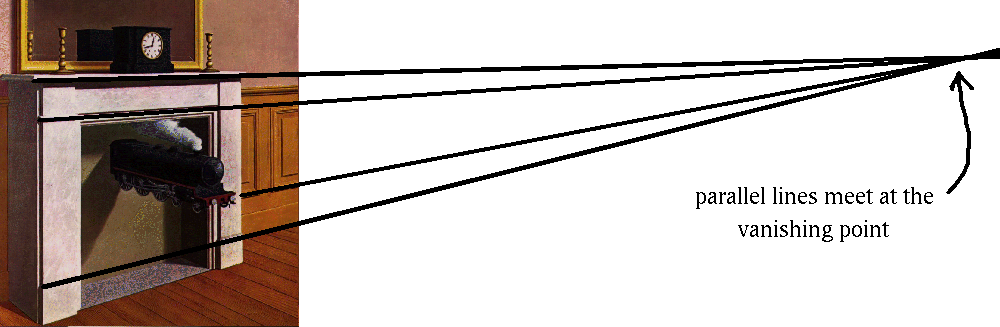

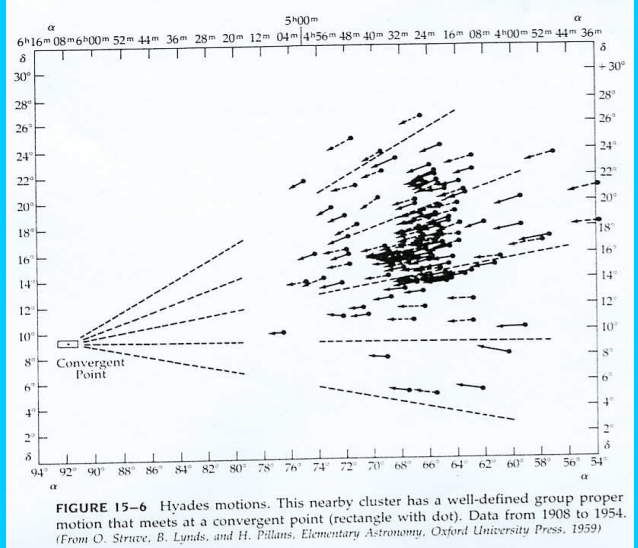

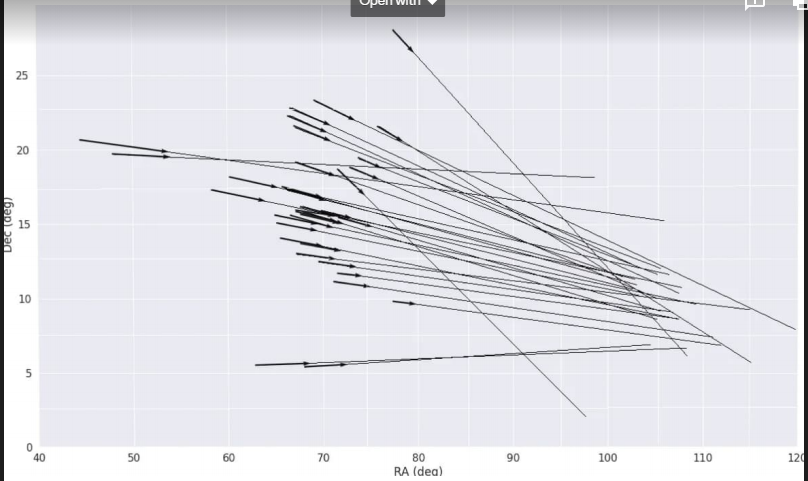

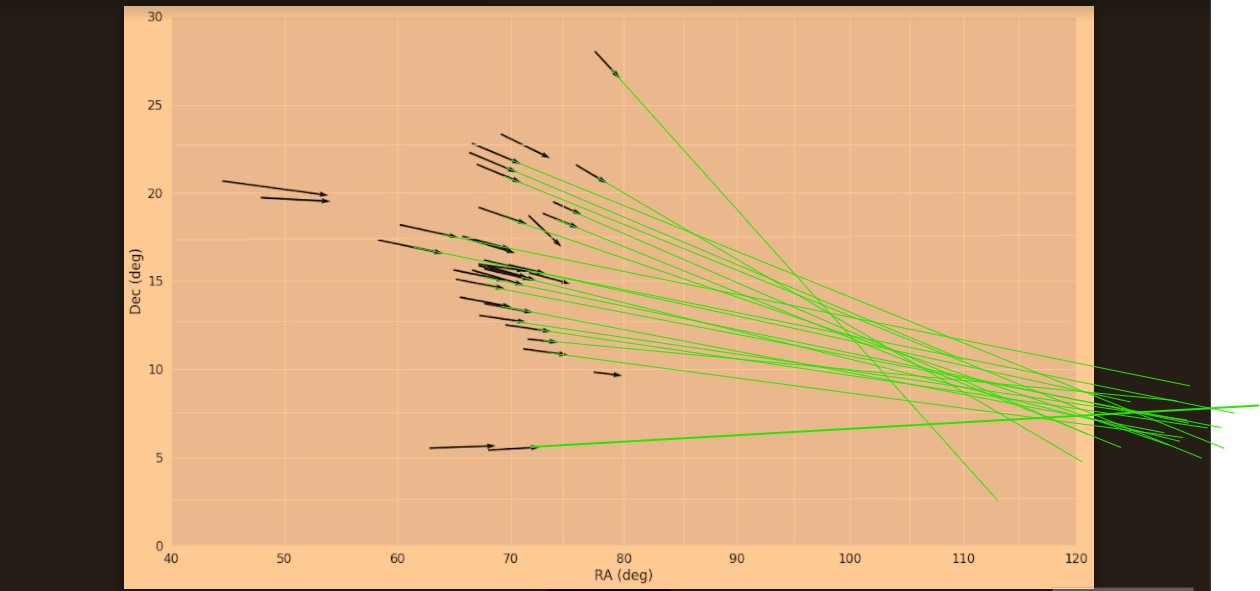

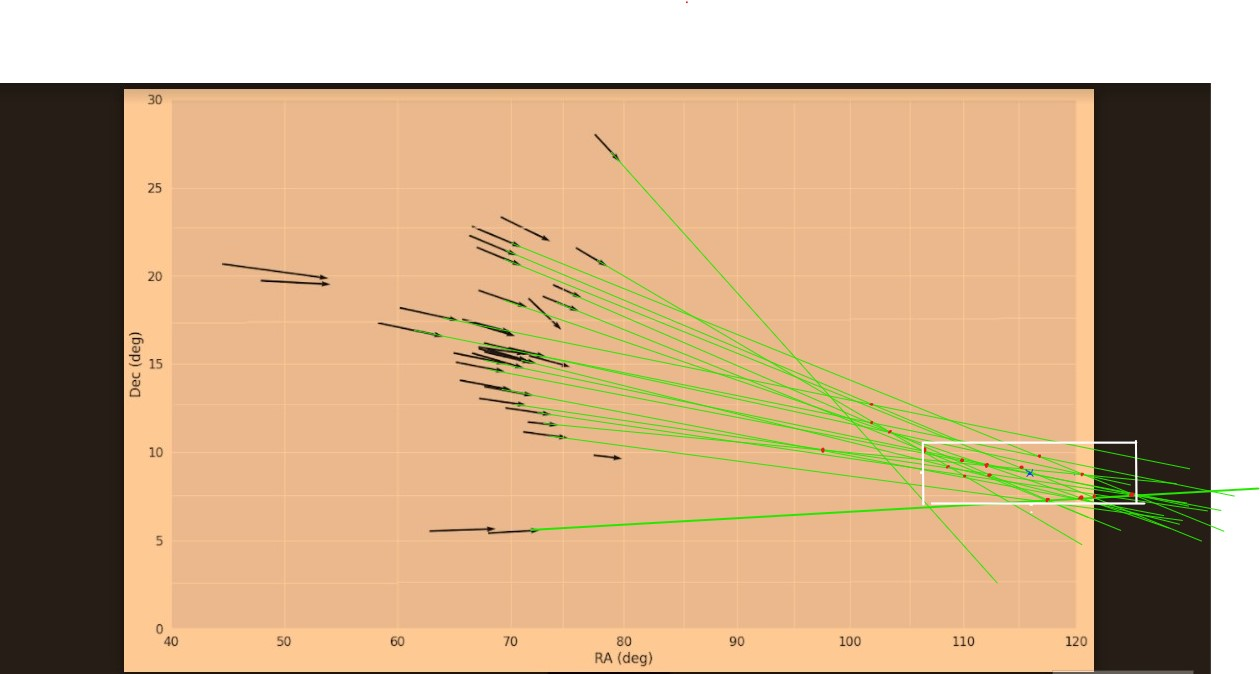

Estimated Convergent point coordinate:
* RA: 115 $\pm$ 10 deg
* Dec 10 $\pm$ 2 deg

In [ ]:
converge_ra, converge_dec = 115, 10
converge_ra_error, converge_dec_error = 10, 2

### Angular Separation

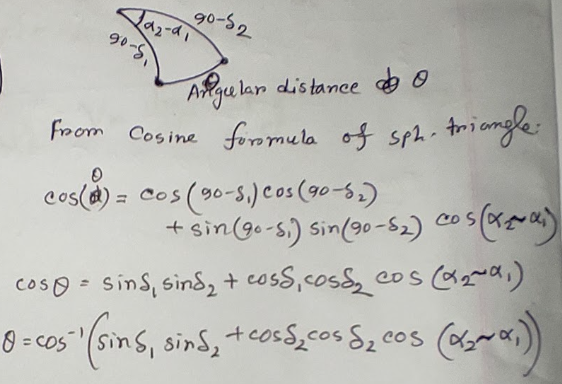

In [ ]:
def ang_distance(ra1, dec1, ra2, dec2):
    ra1, dec1, ra2, dec2 = np.deg2rad([ra1, dec1, ra2, dec2])
    ## theta(rad) = theta(degree) * pi / 180

    cos_theta = np.sin(dec1)*np.sin(dec2) + np.cos(dec1)*np.cos(dec2)*np.cos(ra1-ra2)
    theta = np.arccos(cos_theta)
    return theta

In [ ]:
theta_rad = [ang_distance(i,j, converge_ra, converge_dec) for i,j in zip(data.ra, data.dec)]
data['theta'] = theta_rad
data

,HIP,p,pmra_cosd,pmdec,v_r,dec,ra,theta
0,13834,31.41,234.79,-31.64,28.10,20.67,44.52,1.192677
1,14838,19.44,154.61,-8.39,24.70,19.73,47.91,1.137917
2,18170,24.14,143.97,-29.93,35.00,17.33,58.29,0.967056
3,18735,21.99,129.49,-28.27,31.70,18.19,60.20,0.935378
4,19554,25.89,146.86,5.00,36.60,5.52,62.83,0.904720
5,20205,21.17,115.29,-23.86,39.28,15.63,64.95,0.855601
6,20261,21.20,108.79,-20.67,36.20,15.10,65.15,0.852230
7,20400,21.87,114.04,-21.40,37.80,14.08,65.51,0.846327
8,20455,21.29,107.75,-28.84,39.65,17.54,65.73,0.843250
9,20542,22.36,109.99,-33.47,39.20,17.44,66.02,0.838360


### Proper Motion

In [ ]:
data['pm'] = (data.pmra_cosd**2 + data.pmdec**2)**0.5
data

,HIP,p,pmra_cosd,pmdec,v_r,dec,ra,theta,pm
0,13834,31.41,234.79,-31.64,28.10,20.67,44.52,1.192677,236.912291
1,14838,19.44,154.61,-8.39,24.70,19.73,47.91,1.137917,154.837477
2,18170,24.14,143.97,-29.93,35.00,17.33,58.29,0.967056,147.048175
3,18735,21.99,129.49,-28.27,31.70,18.19,60.20,0.935378,132.540005
4,19554,25.89,146.86,5.00,36.60,5.52,62.83,0.904720,146.945090
5,20205,21.17,115.29,-23.86,39.28,15.63,64.95,0.855601,117.733104
6,20261,21.20,108.79,-20.67,36.20,15.10,65.15,0.852230,110.736232
7,20400,21.87,114.04,-21.40,37.80,14.08,65.51,0.846327,116.030520
8,20455,21.29,107.75,-28.84,39.65,17.54,65.73,0.843250,111.542853
9,20542,22.36,109.99,-33.47,39.20,17.44,66.02,0.838360,114.969739


### Moving Cluster Method

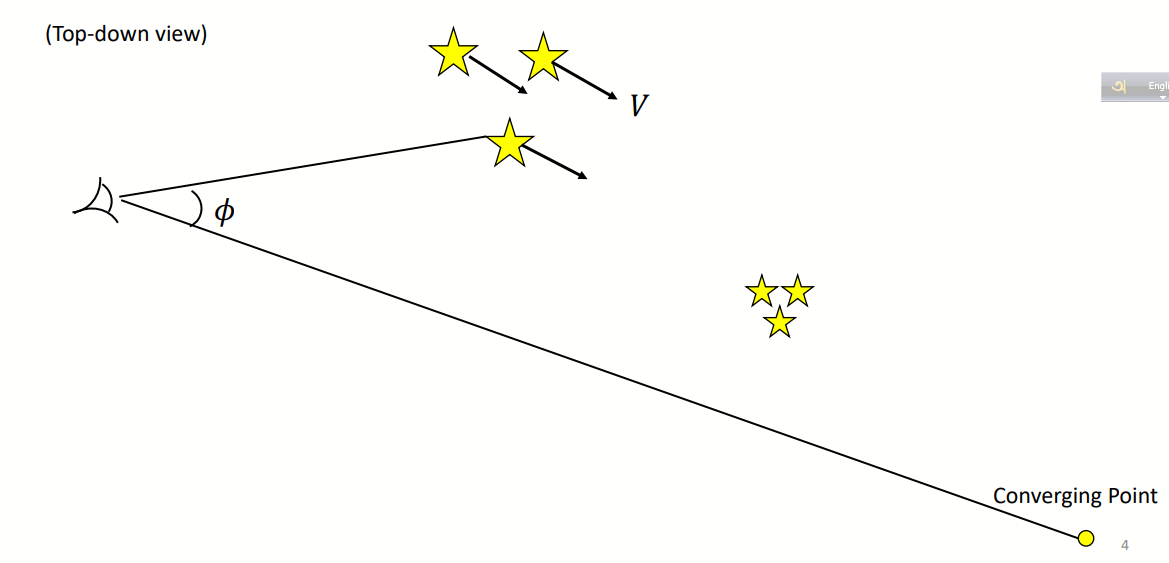

$$\tan \theta = \frac{v_T}{v_r}  = \frac{\mu d}{v_r}$$
$$d = const \frac{v_r \tan\theta}{\mu}$$

Now, Unit of $d$,
\begin{align*}
 &= \frac{km/s}{10^{-3} \, "/ year } \\
 &= 10^3 \,  \frac{year}{s}\frac{km}{"}\\
 &= 10^3 \, \frac{365 \times 24\times 3600 \, s}{s}\,  \frac{pc \cdot km}{pc (")} \\
 &\quad [\text{By multiplying and dividing by pc$$}]\\
 &= 365 \times 24 \times 3600 \times 10^3  \,\, \frac{pc \cdot km}{AU} \\
 &= 365 \times 24 \times 3600 \times 10^3 \,\, \frac{pc \cdot km}{1.5\times 10^8 km} \\
 &= \frac{365 \times 24 \times 3600}{1.5\times 10^8} \times 10^3 \,\, pc \\
 \therefore const &=  \frac{365 \times 24 \times 3600}{1.5\times 10^8} \times 10^3
\end{align*}



In [ ]:
const = 1/(10**(-3) * 1.5 * 10**8 / (365*24*3600))
const

210.24

In [ ]:
# in case you found 4.74 in any of the formula earlier:
# this is how they are related
1000 * 1/4.74

210.97046413502107

$$d = const \frac{v_r \tan\theta}{\mu}$$

In [ ]:
data['distance'] = const * data.v_r * np.tan(data.theta) / data.pm
data

,HIP,p,pmra_cosd,pmdec,v_r,dec,ra,theta,pm,distance
0,13834,31.41,234.79,-31.64,28.10,20.67,44.52,1.192677,236.912291,62.775267
1,14838,19.44,154.61,-8.39,24.70,19.73,47.91,1.137917,154.837477,72.575604
2,18170,24.14,143.97,-29.93,35.00,17.33,58.29,0.967056,147.048175,72.560406
3,18735,21.99,129.49,-28.27,31.70,18.19,60.20,0.935378,132.540005,68.186355
4,19554,25.89,146.86,5.00,36.60,5.52,62.83,0.904720,146.945090,66.631705
5,20205,21.17,115.29,-23.86,39.28,15.63,64.95,0.855601,117.733104,80.754554
6,20261,21.20,108.79,-20.67,36.20,15.10,65.15,0.852230,110.736232,78.588100
7,20400,21.87,114.04,-21.40,37.80,14.08,65.51,0.846327,116.030520,77.390720
8,20455,21.29,107.75,-28.84,39.65,17.54,65.73,0.843250,111.542853,83.922546
9,20542,22.36,109.99,-33.47,39.20,17.44,66.02,0.838360,114.969739,79.708805


## Error Propagation

### One Variable error propagation

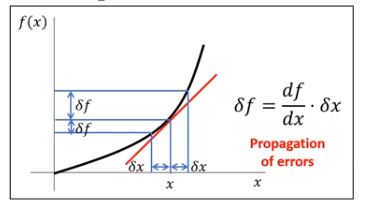

### Two or more variable error propagation

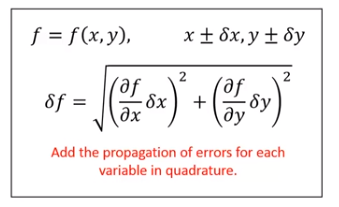

$$\Delta f_x = \frac{df}{dx} \Delta x$$
$$\Delta f_y = \frac{df}{dy} \Delta y$$

$$\Delta f = \sqrt{\Delta f_x^2 + \Delta f_y^2}$$

$$\Delta f = \sqrt{(\frac{df}{dx} \Delta x)^2 + (\frac{df}{dy} \Delta y)^2}$$

### Rules of error propagation

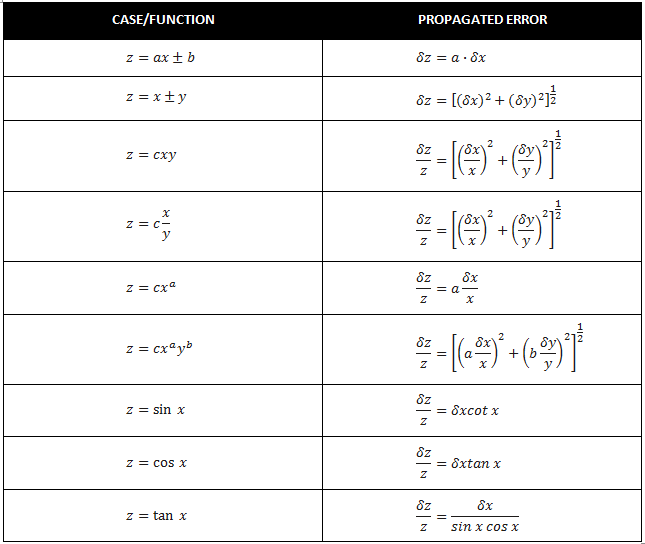

\begin{align*}
    z &= \sin x\\
    \therefore \Delta z &= ?
\end{align*}

Using the rules above,
\begin{align*}
    \frac{\Delta z}{z} &= \cot x\, \Delta x\\
    \frac{\Delta z}{\sin x} &= \frac{\cos x}{\sin x} \Delta x\\
    \therefore \Delta z = \cos x \Delta x
\end{align*}

Using differentiation,
\begin{align*}
    \Delta z &= \frac{d}{dx} z \Delta x\\
    &= \frac{d}{dx} \sin x \Delta x\\
    &= \cos x \Delta x
\end{align*}

Similarly,
\begin{align*}
    x &= \sin^{-1} z\\
    \Delta x &=  \frac{1}{\cos x} \Delta z
\end{align*}


Similarly we can show that,
\begin{align*}
    \text{If } z &= \cos x\\
    \Delta z &= \sin x \Delta x
\end{align*}
and,
\begin{align*}
    x &= \cos^{-1} z\\
    \Delta x &=  \frac{1}{\sin x} \Delta z
\end{align*}

### Examples

$ d = v \theta / \mu $

$\Delta v, \Delta \mu, \Delta \theta$

$\Delta d = ?$

Now, Using the 4th eq. of the table,
$$\frac{\Delta d}{d} = \sqrt{\frac{\Delta v}{v}^2 + \frac{\Delta \theta}{\theta}^2 + \frac{\Delta \mu}{\mu}^2}$$

$$\Delta d = d \sqrt{(\frac{\Delta v}{v})^2 + (\frac{\Delta \theta}{\theta})^2 + (\frac{\Delta \mu}{\mu}^2})$$





$ d = tan \theta  $

$\Delta d = ?$

Now, using the last eq. of the table,
$$\frac{\Delta d}{d} = \frac{\Delta \theta}{sin \theta cos\theta}$$

$$\Delta d = d \frac{\Delta \theta}{sin \theta cos\theta}$$
$$\Delta d = \frac{sin \theta}{cos \theta} \frac{\Delta \theta}{sin \theta cos\theta}$$

$$\Delta d = \sec^2 \theta \, \Delta \theta$$


$d = c/\mu = c \mu^{-1}$

$\Delta d = ?$

Now, using the 5th eq. from the table
$$\frac{\Delta d}{d} = (-1)\frac{\Delta \mu}{\mu} $$
$$\Delta d = -d\frac{\Delta \mu}{\mu} $$

### Distance Error



distance, $$d = const \frac{v_r \tan \theta}{ \mu}$$

$$\Delta d = \sqrt{\Delta d_v ^2 + \Delta d_\theta^2 + \Delta d_\mu^2}$$


Firstly,
$$d_v = const \frac{v_r \tan \theta}{ \mu} = a v_r$$
$$\Delta d_v = a \Delta v_r = const \frac{\tan \theta}{ \mu} \Delta v_r$$

Similarly,
$$d_\theta = const \frac{v_r \tan \theta}{ \mu} = a \tan \theta$$
$$\Delta d_\theta = a sec^2 \theta \Delta \theta = const \frac{v_r}{ \mu} sec^2 \theta \Delta \theta$$

Similarly,
$$d_\mu =  const \frac{v_r \tan \theta}{ \mu} = c \mu^{-1}$$
$$\Delta d_\mu = -d \frac{\Delta \mu}{\mu} = -(const \frac{v_r \tan \theta}{ \mu}) \frac{\Delta \mu}{\mu}$$


Therefore,
$$\Delta d = \sqrt{\Delta d_v ^2 + \Delta d_\theta^2 + \Delta d_\mu^2}$$
$$ = \sqrt{(const \frac{\tan \theta}{ \mu} \Delta v_r)^2 + (const \frac{v_r}{ \mu} sec^2 \theta \Delta \theta)^2 + (-(const \frac{v_r \tan \theta}{ \mu}) \frac{\Delta \mu}{\mu})^2}$$
$$= \frac{const}{ \mu} \sqrt{(\tan \theta \Delta v_r)^2 + (v_r sec^2 \theta \Delta \theta)^2  + ( \frac{v_r \tan \theta \Delta \mu}{\mu})^2}$$









Same approach, just expressing with differentiation:

Distance, $$d = const \frac{v_r \tan \theta}{ \mu}$$

\begin{align*}
\Delta d &= \sqrt{\Delta d_v ^2 + \Delta d_\theta^2 + \Delta d_\mu^2}\\
&= \sqrt{\left( \frac{\partial}{\partial v} d\Delta v_r \right)^2 + \left( \frac{\partial}{\partial \theta} d\Delta \theta \right)^2 + \left( \frac{\partial}{\partial \mu} d\Delta \mu \right)^2}\\
&= \sqrt{\left(const \frac{\tan \theta}{ \mu} \Delta v_r \right)^2 + \left(const \frac{v_r}{ \mu} sec^2 \theta \Delta \theta \right)^2 + \left(-const \frac{v_r \tan \theta}{ \mu^2} \Delta \mu\right)^2}\\
&= \frac{const}{ \mu} \sqrt{(\tan \theta \Delta v_r)^2 + (v_r sec^2 \theta \Delta \theta)^2  + ( \frac{v_r \tan \theta \Delta \mu}{\mu})^2}
\end{align*}

Now let's see how we can do propagation for more than one variables,

$$d = v tan\theta $$
$$d(v,\theta)$$
$$\Delta d = \sqrt{\Delta d_v^2 +  \Delta d_\theta^2}$$

Firstly,
$$\Delta d_v = ?$$
$$d = v \tan\theta = av$$
$$\Delta d_v = a \Delta v = \tan\theta \Delta v$$


Similarly,
$$\Delta d_\theta = ?$$
$$d = v \tan\theta = a \tan\theta$$
$$\frac{\Delta d_\theta}{d_\theta} = a \frac{\Delta \theta}{\sin \theta \cos\theta}$$
$$\Delta d_\theta = a sec^2 \theta \Delta \theta = v \sec^2 \theta \Delta \theta$$

Therefore,
$$\Delta d = \sqrt{\Delta d_v^2 +  \Delta d_\theta^2}$$
$$= \sqrt{(\tan\theta \Delta v)^2 +  (v \sec^2 \theta \Delta \theta)^2}$$



### Theta error

In [ ]:

converge_ra_error, converge_dec_error = np.deg2rad([converge_ra_error, converge_dec_error])

$\Delta \theta = \sqrt{(\Delta RA)^2 + (\Delta dec)^2} $

In [ ]:
del_theta = (converge_ra_error**2 + converge_dec_error**2)**0.5
del_theta

0.1779893582712677

### Calculating $\Delta d$ for the given data

In [ ]:
del_v = 0.01
del_mu = 0

Unit of $\Delta d$,
\begin{align*}
 &= \frac{1}{10^{-3} \, "/ year } \sqrt{(km/s)^2 + (km/s)^2} \\
 &= \frac{km/s}{10^{-3} \, "/ year } \\
 &= 10^3 \,  \frac{year}{s}\frac{km}{"}\\
 &= 10^3 \, \frac{365 \times 24\times 3600 \, s}{s}\,  \frac{pc \cdot km}{pc (")} \\
 &= 365 \times 24 \times 3600 \times 10^3  \,\, \frac{pc \cdot km}{AU} \\
 &= 365 \times 24 \times 3600 \times 10^3 \,\, \frac{pc \cdot km}{1.5\times 10^8 km} \\
 &= \frac{365 \times 24 \times 3600}{1.5\times 10^8} \times 10^3 \,\, pc \\
 &= const \,\, pc
\end{align*}


In [ ]:
del_d = const/(data.pm) * np.sqrt( (np.tan(data.theta) * del_v)**2
                                  + (data.v_r * (1/np.cos(data.theta))**2 * del_theta)**2
                                  + (data.v_r * np.tan(data.theta) * del_mu / data.pm)**2 )


data['del_d'] = del_d
data

,HIP,p,pmra_cosd,pmdec,v_r,dec,ra,theta,pm,distance,del_d
0,13834,31.41,234.79,-31.64,28.10,20.67,44.52,1.192677,236.912291,62.775267,32.566311
1,14838,19.44,154.61,-8.39,24.70,19.73,47.91,1.137917,154.837477,72.575604,33.923097
2,18170,24.14,143.97,-29.93,35.00,17.33,58.29,0.967056,147.048175,72.560406,27.633792
3,18735,21.99,129.49,-28.27,31.70,18.19,60.20,0.935378,132.540005,68.186355,25.407386
4,19554,25.89,146.86,5.00,36.60,5.52,62.83,0.904720,146.945090,66.631705,24.411304
5,20205,21.17,115.29,-23.86,39.28,15.63,64.95,0.855601,117.733104,80.754554,29.032611
6,20261,21.20,108.79,-20.67,36.20,15.10,65.15,0.852230,110.736232,78.588100,28.227476
7,20400,21.87,114.04,-21.40,37.80,14.08,65.51,0.846327,116.030520,77.390720,27.755278
8,20455,21.29,107.75,-28.84,39.65,17.54,65.73,0.843250,111.542853,83.922546,30.075739
9,20542,22.36,109.99,-33.47,39.20,17.44,66.02,0.838360,114.969739,79.708805,28.534573


In [ ]:
sorted_data =  data.sort_values("p", ascending=False)

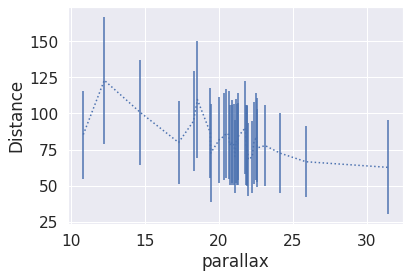

In [ ]:
plt.errorbar(sorted_data.p, sorted_data.distance, sorted_data.del_d , linestyle = ":")
plt.xlabel('parallax')
plt.ylabel('Distance')
plt.show()

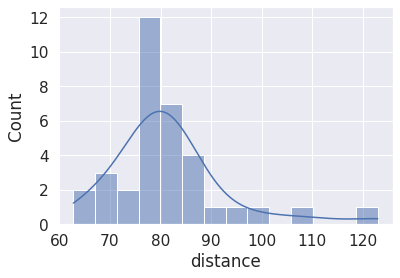

In [ ]:
sns.histplot(data.distance, kde = True)

## Appendix A: Average for data with error

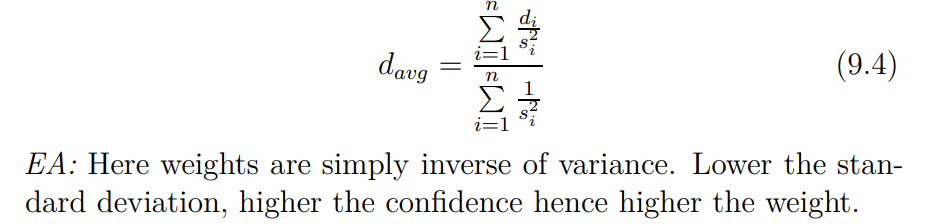

$$d_{avg} = \frac{\sum_{i=1}^n d_i} {\sum_{i=1}^n 1} $$

$$d_{avg, weighted} = \frac{\sum_{i=1}^n w d_i} {\sum_{i=1}^n w} $$

**Center of mass**: w = m

$$x_{avg, com} = \frac{\sum_{i=1}^n m x_i} {\sum_{i=1}^n m} $$
$$y_{avg, com} = \frac{\sum_{i=1}^n m y_i} {\sum_{i=1}^n m} $$

**Data with Error**: w = 1/error^2 = 1/e^2

$$d_{avg, weighted} = \frac{\sum_{i=1}^n \frac{d_i}{e^2}} {\sum_{i=1}^n \frac{1}{e^2}} $$


## Appendix B: Error in angular separation formula

It is given that,
\begin{align*}
    \Delta \alpha_1 &= 0\\
    \Delta \delta_1 &= 0\\
    \Delta \alpha_2 &= 10\\
    \Delta \delta_2 &= 5\\
    \cos \theta &= \sin \delta_1 \sin \delta_2 + \cos \delta_1 \cos \delta_2 \cos (\alpha_1 - \alpha_2)
\end{align*}

Now, the error propagation:
\begin{align*}
    \therefore \Delta (cos \theta) &= \sqrt{\Delta(\sin \delta_1 \sin \delta_2)^2 + \Delta(\cos \delta_1 \cos \delta_2 \cos (\alpha_1 - \alpha_2))^2}\\
    \Delta (\alpha_1 - \alpha_2) &= \sqrt{\Delta \alpha_1^2 + \Delta \alpha_2^2} = \sqrt{\Delta \alpha_2^2} = \Delta \alpha_2\\
    \frac{\Delta(\sin \delta_1 \sin \delta_2)}{\sin \delta_1 \sin \delta_2} &= \sqrt{\left(\frac{\Delta \sin \delta_1}{\sin \delta_1}\right)^2 + \left(\frac{\Delta \sin \delta_2}{\sin \delta_2}\right)^2}\\
    &= \sqrt{\left(\frac{\cos \delta_1 \Delta \delta_1}{\sin \delta_1}\right)^2 + \left(\frac{\cos \delta_2 \Delta \delta_2}{\sin \delta_2}\right)^2}\\
    &= \sqrt{\left(\frac{\cos \delta_2 \Delta \delta_2}{\sin \delta_2}\right)^2}\\
    &= \frac{\cos \delta_2 \Delta \delta_2}{\sin \delta_2}\\
    \therefore \Delta(\sin \delta_1 \sin \delta_2) &= \frac{\cos \delta_2 \Delta \delta_2}{\sin \delta_2} \sin \delta_1 \sin \delta_2\\
    &= \sin \delta_1 \cos \delta_2 \Delta \delta_2
\end{align*}

Similarly,
\begin{align*}
    \frac{\Delta (\cos \delta_1 \cos \delta_2 \cos (\alpha_1 - \alpha_2))}{\cos \delta_1 \cos \delta_2 \cos (\alpha_1 - \alpha_2)} &= \sqrt{\left(\frac{\Delta \cos \delta_1}{\cos \delta_1}\right)^2 + \left(\frac{\Delta \cos \delta_2}{\cos \delta_2}\right)^2 + \left(\frac{\Delta \cos (\alpha_1 - \alpha_2)}{\cos (\alpha_1 - \alpha_2)}\right)^2}\\
    &= \sqrt{\left(\frac{\sin \delta_1 \Delta \delta_1}{\cos \delta_1}\right)^2 + \left(\frac{\sin \delta_2 \Delta \delta_2}{\cos \delta_2}\right)^2 + \left(\frac{\sin (\alpha_1 - \alpha_2) \Delta (\alpha_1 - \alpha_2)}{\cos (\alpha_1 - \alpha_2)}\right)^2}\\
    &= \sqrt{\left(\frac{\sin \delta_2 \Delta \delta_2}{\cos \delta_2}\right)^2 + \left(\frac{\sin (\alpha_1 - \alpha_2) \Delta \alpha_2}{\cos (\alpha_1 - \alpha_2)}\right)^2}\\
    &=  \sqrt{\frac{(\sin \delta_2 \Delta \delta_2)^2}{(\cos \delta_2)^2} + \frac{(\sin (\alpha_1 - \alpha_2) \Delta \alpha_2)^2}{(\cos (\alpha_1 - \alpha_2))^2}}\\
    &= \sqrt{\frac{(\sin \delta_2 \Delta \delta_2)^2 (\cos (\alpha_1 - \alpha_2))^2 + (\sin (\alpha_1 - \alpha_2) \Delta \alpha_2)^2 (\cos \delta_2)^2}{(\cos \delta_2)^2 (\cos (\alpha_1 - \alpha_2))^2}}\\
    \therefore \Delta (\cos \delta_1 \cos \delta_2 \cos (\alpha_1 - \alpha_2)) &= \cos \delta_1\sqrt{(\sin \delta_2 \Delta \delta_2)^2 (\cos (\alpha_1 - \alpha_2))^2 + (\sin (\alpha_1 - \alpha_2) \Delta \alpha_2)^2 (\cos \delta_2)^2}
\end{align*}

Adding all of them together,
\begin{align*}
    &  \quad\, \Delta(\sin \delta_1 \sin \delta_2)^2 + \Delta(\cos \delta_1 \cos \delta_2 \cos (\alpha_1 - \alpha_2))^2 \\
    &= (\sin \delta_1 \cos \delta_2 \Delta \delta_2)^2 + (\cos \delta_1)^2 (\sin \delta_2 \Delta \delta_2)^2 (\cos (\alpha_1 - \alpha_2))^2 + (\sin (\alpha_1 - \alpha_2) \Delta \alpha_2)^2 (\cos \delta_1)^2(\cos \delta_2)^2
\end{align*}


## Appendix C: Proving the formulas of the error propagation table using the main equation and differentiation

$$f(x,y) = xy$$

\begin{align*}
\Delta f &= \sqrt{(\frac{df}{dx} \Delta x)^2 + (\frac{df}{dy} \Delta y)^2}\\
 &= \sqrt{\left(\frac{d}{dx} xy \,\, \Delta x \right)^2 + \left(\frac{d}{dy} xy \, \Delta y \right)^2}\\
&= \sqrt{(y \Delta x)^2 + (x \Delta y)^2}\\
&= \sqrt{\left(\frac{xy}{x} \Delta x \right)^2 + \left(\frac{xy}{y} \Delta y \right)^2}\\
 &= \sqrt{\left(\frac{f}{x} \Delta x \right)^2 + \left(\frac{f}{y} \Delta y \right)^2}\\
 &= f \sqrt{\left(\frac{\Delta x}{x} \right)^2 + \left(\frac {\Delta y}{y}\right)^2}\\
\therefore \frac{\Delta f}{f} &= \sqrt{\left(\frac{\Delta x}{x} \right)^2 + \left(\frac {\Delta y}{y}\right)^2}
\end{align*}

